In [12]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
from keras.models import load_model


In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img

Using TensorFlow backend.


In [3]:
print(os.listdir("E:\\CS\\Machine_Learning\\chest_xray"))

['.DS_Store', 'test', 'train', 'val', '__MACOSX']


In [4]:
train_folder= "E:\\CS\\Machine_Learning\\chest_xray\\train"
test_folder="E:\\CS\\Machine_Learning\\chest_xray\\test"
val_folder="E:\\CS\\Machine_Learning\\chest_xray\\val"

train_n="E:\\CS\\Machine_Learning\\chest_xray\\train\\NORMAL"
train_p="E:\\CS\\Machine_Learning\\chest_xray\\train\\PNEUMONIA"


In [82]:
print(len(os.listdir(train_n)))

1342


NameError: name 'set_title' is not defined

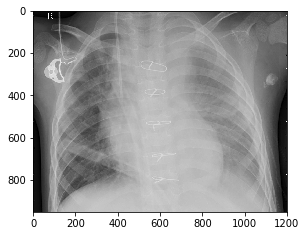

In [8]:
    norm_load=Image.open("E:\\CS\\Semester_6\\Machine_Learning\\chest_xray\\train\\PNEUMONIA\\person3_bacteria_11.jpeg")

f=plt.figure(figsize=(10,6))
a1= f.add_subplot(1,2,1)
img_plot=plt.imshow(norm_load)
a1 = set_title("Normal")

In [5]:
cnn = Sequential()

    # Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))

#Pooling
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# 2nd Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu"))

# 2nd Pooling layer
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten the layer
cnn.add(Flatten())

# Fully Connected Layers
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'sigmoid', units = 1))

# Compile the Neural network
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen =  ImageDataGenerator(rescale= 1./255)

training_set = train_datagen.flow_from_directory("E:\\CS\\Machine_Learning\\chest_xray\\train",
                                                 target_size=(64,64),
                                                 batch_size= 32,
                                                 class_mode= 'binary')
test_set= test_datagen.flow_from_directory("E:\\CS\\\\Machine_Learning\\chest_xray\\test",
                                            target_size= (64,64),
                                             batch_size= 32,
                                             class_mode='binary')
validation_generator= test_datagen.flow_from_directory("E:\\CS\\SMachine_Learning\\chest_xray\\val",
                                           target_size=(64,64),
                                            batch_size=32,
                                            class_mode='binary')


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [6]:
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total para

In [11]:
cnn_model = cnn.fit_generator(training_set,
                         steps_per_epoch = 5216,
                         epochs = 5,
                         validation_data = validation_generator,
                         validation_steps = 624)

Epoch 1/5
5216/5216 [==============================] - 3434s 658ms/step - loss: 0.1264 - acc: 0.9511 - val_loss: 0.7863 - val_acc: 0.6875
Epoch 2/5
5216/5216 [==============================] - 3375s 647ms/step - loss: 0.0748 - acc: 0.9727 - val_loss: 0.2184 - val_acc: 0.8750
Epoch 3/5
5216/5216 [==============================] - 3378s 648ms/step - loss: 0.0493 - acc: 0.9816 - val_loss: 0.3173 - val_acc: 0.8750
Epoch 4/5
5216/5216 [==============================] - 3379s 648ms/step - loss: 0.0363 - acc: 0.9866 - val_loss: 0.1864 - val_acc: 0.8750
Epoch 5/5
5216/5216 [==============================] - 3397s 651ms/step - loss: 0.0255 - acc: 0.9905 - val_loss: 0.0956 - val_acc: 1.0000


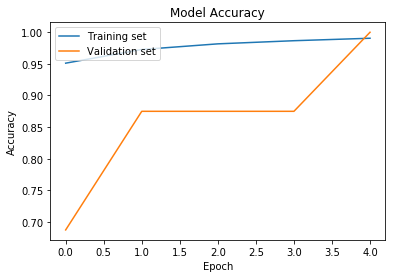

In [12]:
# Accuracy 
plt.plot(cnn_model.history['acc'])
plt.plot(cnn_model.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

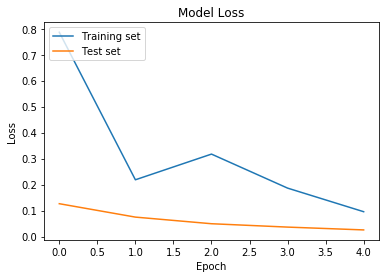

In [13]:
# Loss 

plt.plot(cnn_model.history['val_loss'])
plt.plot(cnn_model.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()

In [14]:
test_accu=cnn.evaluate_generator(test_set, steps=624)
print('The testing accuracy is :',test_accu[1]*100, '%')

The testing accuracy is : 90.8740755957272 %


In [5]:
 # load model
    model = load_model("my_model.h5")

In [17]:
    img_path = 'C:\\Users\\arslan\\Desktop\\NORMAL\\NORMAL2-IM-1440-0001.jpg'    # dog


In [19]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

In [28]:
img_width, img_height = 64, 64

# load the model we saved
model = load_model('my_model.h5')
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [71]:
# predicting images
img = image.load_img("E:\\CS\\Machine_Learning\\chest_xray\\test\\NORMAL\\NORMAL2-IM-0289-0001.jpeg", target_size=(img_width, img_height))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x
                   ])
classes = model.predict_classes(images, batch_size=1)
print (classes[0])


[0]
